In [148]:
from logging import WARNING, INFO
from typing import Callable, Dict, List, Optional, Tuple, Union
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import cm

In [149]:
run_name = 'graph_8_32'
seed = '1999'
save_path = 'plots/'
#file_path = 'outputs/no_pretrain/' + 'seed_' + seed + '/' + run_name #NEED TO READ ALL FILES
root_path = 'outputs/no_pretrain/seed1999_rounds1024/'
file_path = root_path + run_name
num_agents = 10

In [150]:
tplgys = []
raw_tplgys = []
acc_distr = []
for i in range(5):
    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_pool.out', mode = 'r', encoding = 'utf-8-sig')
    lines = file.readlines()
    tplgys.append(lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_raw.out', mode = 'r', encoding = 'utf-8-sig')
    r_lines = file.readlines()
    raw_tplgys.append(r_lines)
    file.close()

    # Read file
    file = open(file_path+'/'+str(i)+'_'+run_name+'_acc_distr.out', mode = 'r', encoding = 'utf-8-sig')
    a_lines = file.readlines()
    acc_distr.append(a_lines)
    file.close()

In [151]:
tplgy_ID = []
loss = []
acc = []

for tplgy in tplgys:
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for line in tplgy:
        tmp1.append(int(line.split(' ')[1]))
        tmp2.append(float(line.split(' ')[-3]))
        tmp3.append(float(line.split(' ')[-1]))
    tplgy_ID.append(tmp1)
    loss.append(tmp2)
    acc.append(tmp3)
print(tplgy_ID)
print(loss)
print(acc)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
[[181.98486876487732, 178.46078097820282, 170.2221940755844, 178.06333422660828, 181.92408514022827, 172.83817982673645, 189.67732167243958, 184.0255764722824, 181.56743049621582, 181.88875269889832], [189.56115818023682, 77.44615548849106, 76.34531396627426, 77.21619692444801, 185.52985095977783, 80.84907120466232, 81.96346485614777, 85.46279257535934, 169.46686708927155, 181.9777364730835], [59.17213490605354, 60.01470863819122, 60.53121376037598, 59.232702285051346, 58.845078468322754, 59.28595393896103, 60.15144830942154, 59.4529213309288, 173.10421085357666, 182.00575828552246], [56.71244919300079, 56.55067753791809, 56.62578183412552, 56.418510019779205, 56.54938542842865, 56.43804705142975, 57.00402212142944, 56.363714039325714, 181.2931512594223, 181.89406394958496], [58.95448726415634, 58.28414535522461, 58.42856705188

In [152]:
exec_times = []
for tplgy in raw_tplgys:
    exec_times.append(float(tplgy[-1].split(' ')[1])/60)
print(exec_times)

[463.2145636002223, 492.63691616455714, 514.0312803864479, 539.7361663341522, 549.0423131108284]


In [153]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], acc[0], '.')
# axs[0, 0].set_ylim(0, 0.8)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], acc[1], '.')
# axs[0, 1].set_ylim(0, 0.8)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], acc[2], '.')
# axs[1, 0].set_ylim(0, 0.8)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], acc[3], '.')
# axs[1, 1].set_ylim(0, 0.8)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], acc[4], '.')
# axs[2, 0].set_ylim(0, 0.8)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Acc')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_acc.pdf')

In [154]:
print(tplgy_ID)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


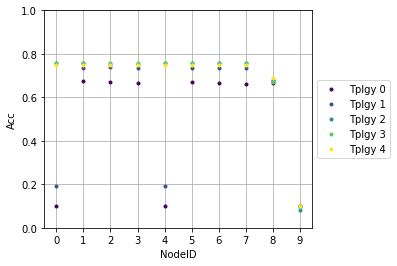

In [155]:
viridis = cm.get_cmap('viridis', 5)
plt.plot(tplgy_ID[0], acc[0], '.', color=viridis(0))
plt.plot(tplgy_ID[1], acc[1], '.', color=viridis(0.2))
plt.plot(tplgy_ID[2], acc[2], '.', color=viridis(0.4))
plt.plot(tplgy_ID[3], acc[3], '.', color=viridis(0.6))
plt.plot(tplgy_ID[4], acc[4], '.', color=viridis(0.8))
plt.ylim(0, 1.)
x = np.arange(0, num_agents, 1)
plt.xticks(x)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Acc')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(save_path+run_name+'_summarized_acc.pdf')

In [156]:
# fig, axs = plt.subplots(3, 2)
# axs[0, 0].plot(tplgy_ID[0], loss[0], '.')
# axs[0, 0].set_ylim(50, 200)
# axs[0, 0].set_title("Tplgy 0", fontsize=9)
# axs[0, 1].plot(tplgy_ID[1], loss[1], '.')
# axs[0, 1].set_ylim(50, 200)
# axs[0, 1].set_title("Tplgy 1", fontsize=9)
# axs[1, 0].plot(tplgy_ID[2], loss[2], '.')
# axs[1, 0].set_ylim(50, 200)
# axs[1, 0].set_title("Tplgy 2", fontsize=9)
# axs[1, 1].plot(tplgy_ID[3], loss[3], '.')
# axs[1, 1].set_ylim(50, 200)
# axs[1, 1].set_title("Tplgy 3", fontsize=9)
# axs[2, 0].plot(tplgy_ID[4], loss[4], '.')
# axs[2, 0].set_ylim(50, 200)
# axs[2, 0].set_title("Tplgy 4", fontsize=9)
# 
# for ax in axs.flat:
#     ax.set(xlabel='Node ID', ylabel='Loss')
# 
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
# 
# plt.savefig(save_path+run_name+'_loss.pdf')

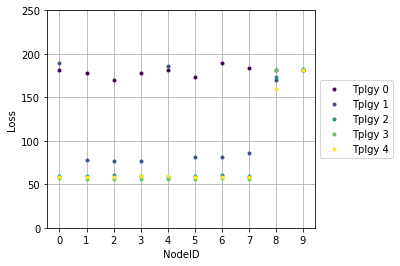

In [157]:
viridis = cm.get_cmap('viridis', 5)
plt.plot(tplgy_ID[0], loss[0], '.', color=viridis(0))
plt.plot(tplgy_ID[1], loss[1], '.', color=viridis(0.2))
plt.plot(tplgy_ID[2], loss[2], '.', color=viridis(0.4))
plt.plot(tplgy_ID[3], loss[3], '.', color=viridis(0.6))
plt.plot(tplgy_ID[4], loss[4], '.', color=viridis(0.8))
x = np.arange(0, num_agents, 1)
plt.xticks(x)
plt.ylim(0, 250)
#plt.title("Tplgy 0", fontsize=9)
plt.xlabel('NodeID')
plt.ylabel('Loss')
plt.grid()

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(save_path+run_name+'_summarized_loss.pdf')

In [158]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy = []
num_rounds = 1024
for tplgy in raw_tplgys:
    tmp = tplgy[1].split()
    tmp_loss = []
    for i in range(1,num_rounds+1):
        tmp_loss.append((float(tmp[2*i][:-1])))
    loss_per_tplgy.append(tmp_loss)

In [159]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
loss_per_tplgy_by_agent = []
num_rounds = 1024
for loss_tplgy in loss_per_tplgy:
    loss_per_agent = []
    for i in range(num_agents):
        tmp_loss = []
        for j in range(i+1, num_rounds, num_agents):
            tmp_loss.append((loss_tplgy[j]))
        loss_per_agent.append(tmp_loss)
    loss_per_tplgy_by_agent.append(loss_per_agent)

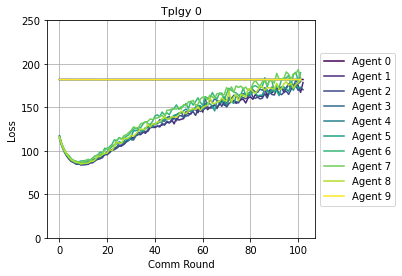

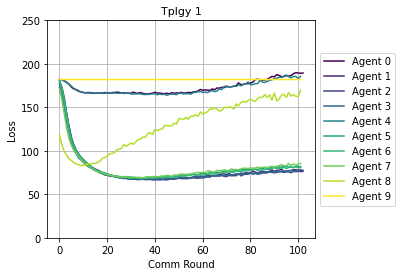

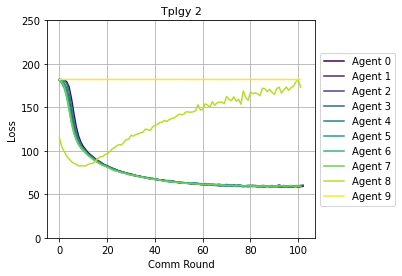

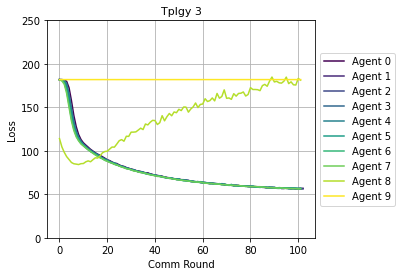

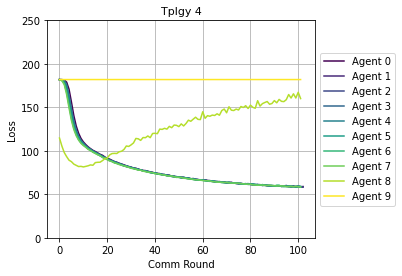

In [160]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
viridis = cm.get_cmap('viridis', 10)
for i in range(5):
    plt.plot(loss_per_tplgy_by_agent[i][0], color=viridis(0))
    plt.plot(loss_per_tplgy_by_agent[i][1], color=viridis(0.1))
    plt.plot(loss_per_tplgy_by_agent[i][2], color=viridis(0.2))
    plt.plot(loss_per_tplgy_by_agent[i][3], color=viridis(0.3))
    plt.plot(loss_per_tplgy_by_agent[i][4], color=viridis(0.4))
    plt.plot(loss_per_tplgy_by_agent[i][5], color=viridis(0.5))
    plt.plot(loss_per_tplgy_by_agent[i][6], color=viridis(0.6))
    plt.plot(loss_per_tplgy_by_agent[i][7], color=viridis(0.7))
    plt.plot(loss_per_tplgy_by_agent[i][8], color=viridis(0.8))
    plt.plot(loss_per_tplgy_by_agent[i][9], color=viridis(0.9))
    plt.ylim(0, 250)
    plt.xlabel('Comm Round')
    plt.ylabel('Loss')
    plt.title("Tplgy "+str(i), fontsize=11)
    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Agent 0', 'Agent 1', 'Agent 2', 'Agent 3', 'Agent 4', 'Agent 5', 'Agent 6', 'Agent 7', 'Agent 8', 'Agent 9'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    
    plt.savefig(save_path+str(i)+'_'+run_name+'_raw_summarized_loss.pdf')
    plt.show()


In [161]:
'''Visualize acc average per pool and comm round'''

acc1 = []
for accuracies in acc_distr:
    acc2 = []
    for acc in accuracies:
        res = []
        for idx in acc.split(' '):
            f_idx = float(idx)
            if f_idx == 1.0:
                f_idx = 0.0
            res.append(f_idx)
        #res = [float(idx) for idx in acc.split(' ')]
        if res == 1.0:
            res = 0.0
        acc2.append(np.average(res))
    acc1.append(acc2)

In [162]:
'''Create sets with exec times'''
acc_per_nodes = []
for i in range(num_agents):
    tmp_tplgy = []
    for j in range(5):
        tmp_tplgy.append(acc1[j][i::10])
    acc_per_nodes.append(tmp_tplgy)

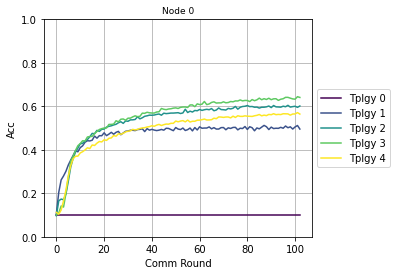

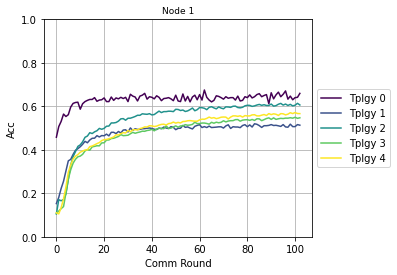

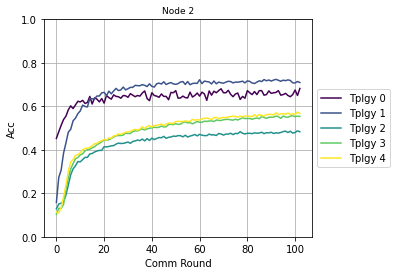

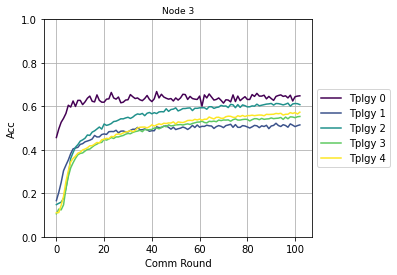

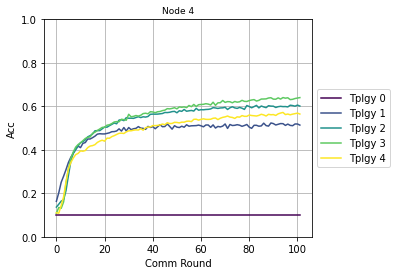

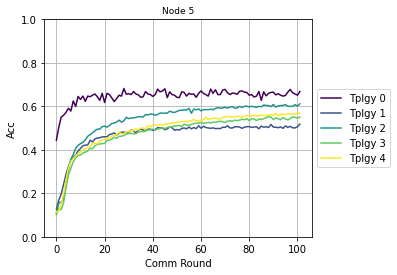

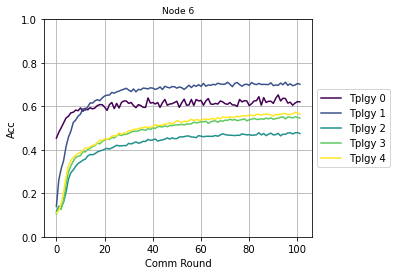

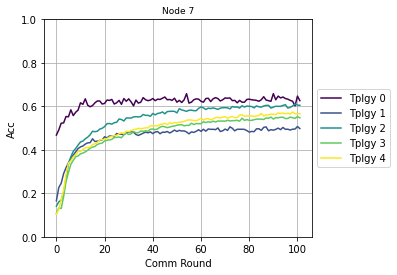

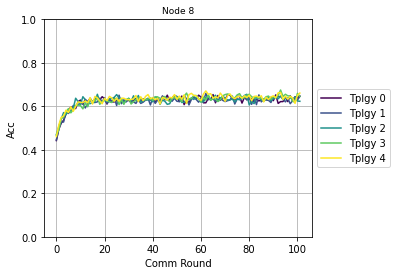

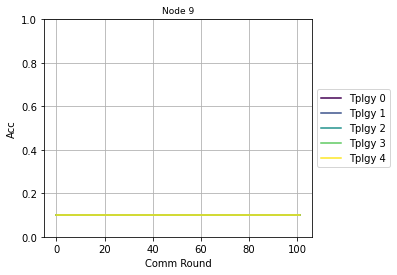

In [163]:
viridis = cm.get_cmap('viridis', 5)
for node in range(num_agents):
    for i in range(5):
        plt.plot(acc_per_nodes[node][i], color=viridis(0.1 * 2.*i))
    #x = np.arange(0, num_rounds, 1)
    #plt.xticks(x)
    plt.ylim(0.0, 1.0)
    plt.title('Node ' + str(node), fontsize=9)
    plt.xlabel('Comm Round')
    plt.ylabel('Acc')
    plt.grid()

    ax = plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(save_path+'node'+ str(node) +'_distr_val_acc.pdf')
    plt.show()

In [164]:
# plt.plot(acc1[0], '.')
# plt.plot(acc1[1], '.')
# plt.plot(acc1[2], '.')
# plt.plot(acc1[3], '.')
# plt.plot(acc1[4], '.')
# #x = np.arange(0, num_rounds, 1)
# #plt.xticks(x)
# plt.ylim(0.0, 1.0)
# #plt.title("Tplgy 0", fontsize=9)
# plt.xlabel('Comm Round')
# plt.ylabel('Acc')
# 
# ax = plt.gca()
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(['Tplgy 0', 'Tplgy 1', 'Tplgy 2', 'Tplgy 3', 'Tplgy 4'], loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(save_path+run_name+'_summ_distr_acc.pdf')

In [165]:
#VISUALIZE LOSSES PER TOPOLOGY AND AGENT
# for i in range(5):
#     fig, axs = plt.subplots(5, 2)
#     axs[0, 0].plot(loss_per_tplgy_by_agent[i][0], '.')
#     axs[0, 0].set_ylim(50, 450)
#     axs[0, 0].set_title("Agent 0", fontsize=9)
#     axs[0, 1].plot(loss_per_tplgy_by_agent[i][1], '.')
#     axs[0, 1].set_ylim(50, 450)
#     axs[0, 1].set_title("Agent 1", fontsize=9)
#     axs[1, 0].plot(loss_per_tplgy_by_agent[i][2], '.')
#     axs[1, 0].set_ylim(50, 450)
#     axs[1, 0].set_title("Agent 2", fontsize=9)
#     axs[1, 1].plot(loss_per_tplgy_by_agent[i][3], '.')
#     axs[1, 1].set_ylim(50, 450)
#     axs[1, 1].set_title("Agent 3", fontsize=9)
#     axs[2, 0].plot(loss_per_tplgy_by_agent[i][4], '.')
#     axs[2, 0].set_ylim(50, 450)
#     axs[2, 0].set_title("Agent 4", fontsize=9)
#     axs[2, 1].plot(loss_per_tplgy_by_agent[i][5], '.')
#     axs[2, 1].set_ylim(50, 450)
#     axs[2, 1].set_title("Agent 5", fontsize=9)
#     axs[3, 0].plot(loss_per_tplgy_by_agent[i][6], '.')
#     axs[3, 0].set_ylim(50, 450)
#     axs[3, 0].set_title("Agent 6", fontsize=9)
#     axs[3, 1].plot(loss_per_tplgy_by_agent[i][7], '.')
#     axs[3, 1].set_ylim(50, 450)
#     axs[3, 1].set_title("Agent 7", fontsize=9)
#     axs[4, 0].plot(loss_per_tplgy_by_agent[i][8], '.')
#     axs[4, 0].set_ylim(50, 450)
#     axs[4, 0].set_title("Agent 8", fontsize=9)
#     axs[4, 1].plot(loss_per_tplgy_by_agent[i][9], '.')
#     axs[4, 1].set_ylim(50, 450)
#     axs[4, 1].set_title("Agent 9", fontsize=9)
# 
#     for ax in axs.flat:
#         ax.set(xlabel='Comm round', ylabel='Loss')
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
#     plt.savefig(save_path+run_name+'_evol_loss_tplgy' + str(i) + '.pdf')

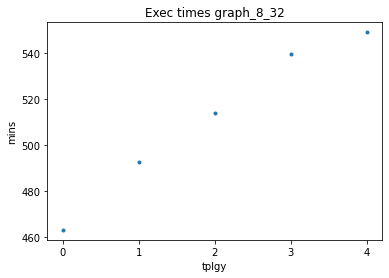

In [166]:
'''Visualize Exec times per topology'''

plt.plot(range(5), exec_times, '.')
x = np.arange(0, 5, 1)
plt.xticks(x)
plt.xlabel("tplgy")
plt.ylabel("mins")
plt.title("Exec times " + run_name)
plt.savefig(save_path+run_name+'_exec_times.pdf')
plt.show()

In [167]:
# plt.plot(tplgy_ID[0], acc[0], 'o')
# plt.ylim(0.1, 0.6)
# plt.title("ACC per tplgy " + run_name)
# plt.show()

In [168]:
# plt.plot(tplgy_ID[0], loss[0], 'o')
# plt.ylim(100, 300)
# plt.title("Loss per tplgy " + run_name)
# plt.show()